<a href="https://colab.research.google.com/github/vos32/Github/blob/main/%D0%9B%D0%A013_%D0%86%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2%D0%B0_%D0%92%D0%B0%D1%80%D1%96%D0%B0%D0%BD%D1%82_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 13.

#Метод Ейлера

x = [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 
y = [2.6    2.8952 3.2218 3.583  3.982  4.4228 4.9095 5.4466 6.0393 6.6929]


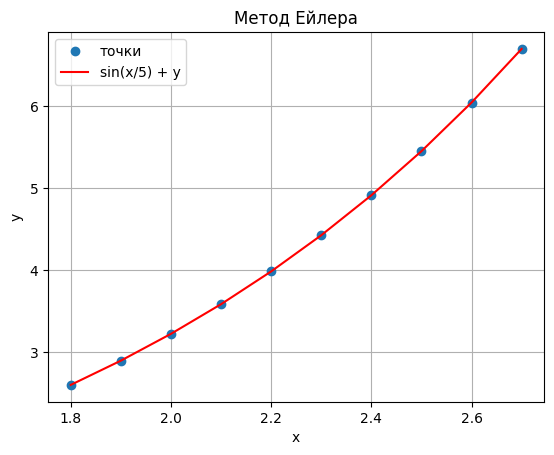

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x/5) + y

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 1.8, 2.8, 0.1, 2.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "sin(x/5) + y"])
plt.grid()
plt.show()

In [13]:
#Додати перевірку odeint для першого завдання


In [14]:
#додати перевірку solve_ivp для перешого завдання

#Метод Ейлера-Коші

x = [1.8        1.91111111 2.02222222 2.13333333 2.24444444 2.35555556
 2.46666667 2.57777778 2.68888889 2.8       ] 
y = [2.6    2.911  3.2569 3.6412 4.068  4.5417 5.0672 5.6499 6.2959 7.0117]


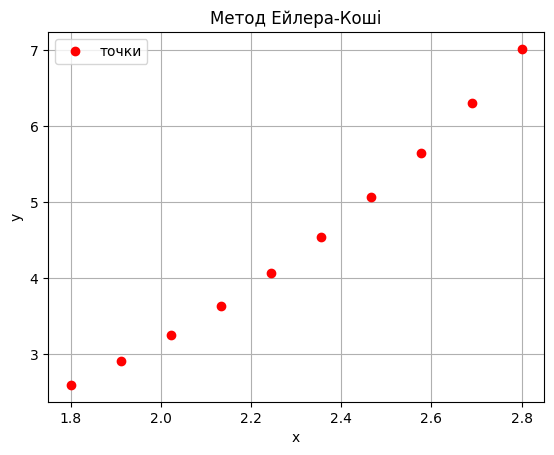

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return np.sin(x/5) + y

a = 1.8  # ліва межа відрізку
b = 2.8  # права межа відрізку
h = 0.1  # крок
y0 = 2.6  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x, враховуючи останнє значення
x = np.linspace(a, b, n + 1)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x/5) + y"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y= [2.6        2.91145887 3.25762756 3.6421406  4.06901388 4.542685
 5.06805741 5.6505497  6.29614899 7.01147218 7.8038308 ]


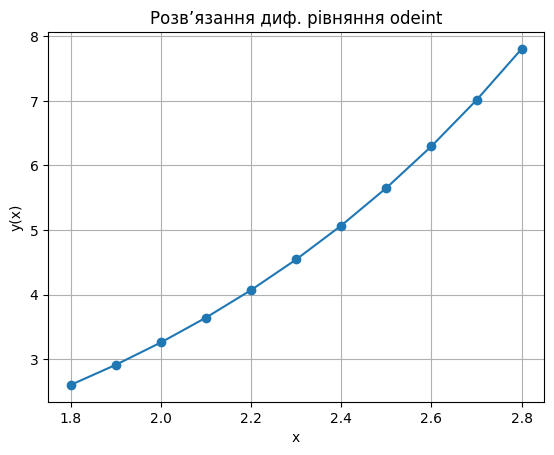

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return np.sin(x/5) + y

# Початкова умова
y0 = 2.6

# Значення x
x = np.arange(1.8, 2.8 + 0.1, 0.1)

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння odeint')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y= [2.6        2.91145902 3.2577105  3.64230444 4.06914627 4.54268004
 5.06788843 5.65029277 6.29595301 7.01146775 7.8039742 ]


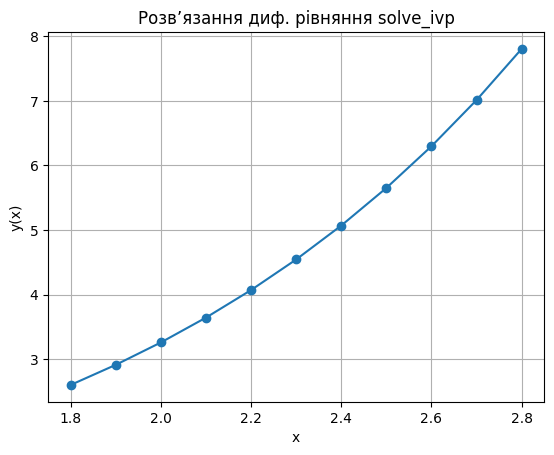

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return np.sin(x/5) + y

# Початкова умова
y0 = [2.6]  # Потрібно передати як список

# Значення x
x = np.linspace(1.8, 2.8, 11)

# Розв'язання ODE
sol = solve_ivp(model, [1.8, 2.8], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння solve_ivp')
plt.grid()
plt.show()
